## Import libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer 
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Naive-Bayes
from sklearn.naive_bayes import MultinomialNB
# SVM
from sklearn.svm import SVC

## Read data

#### Data for training and testing

In [26]:
file_path_conc = r'C:\Users\Chill\Desktop\INZYNIERKA\dane\found_internet\CONCATENATED_DATA.xlsx'
df_original = pd.read_excel(file_path_conc)

In [27]:
df_original.head()

,Comment,Is_toxic,source
0,Dla mnie faworytem do tytułu będzie Cracovia. ...,0,dataset_poleval
1,Brawo ty Daria kibic ma być na dobre i złe,0,dataset_poleval
2,"Super, polski premier składa kwiaty na grobach...",0,dataset_poleval
3,Musi. Innej drogi nie mamy.,0,dataset_poleval
4,"Odrzut natychmiastowy, kwaśna mina, mam problem",0,dataset_poleval


#### Data to predict

In [28]:
# Load the CSV file with the correct encoding (UTF-8)
file_path_yt = r'C:\Users\Chill\Desktop\INZYNIERKA\dane\extracted_comments\comms_test.xlsx'
# comments from 4 videos:
# https://www.youtube.com/watch?v=t4O1LLk6qlY
# https://www.youtube.com/watch?v=r3qhl12iHKc
# https://www.youtube.com/watch?v=iLTLbe13hLg
# https://www.youtube.com/watch?v=v7CQkivQNQI

df_predict = pd.read_excel(file_path_yt)

In [29]:
df_predict.head()

,Comments
0,JKM jest zwolennikiem otwartej migracji ludzi ...
1,Korwin jest najlepszy
2,ten występ się dobrze starzeje jak popatrzymy ...
3,Wracam po protestach we Francji.
4,"Po 7 latach sie sprawdziło, gosc mysli lata do..."


## Preprocessing

In [30]:
df = df_original

In [31]:
# Wybieram na razie tylko jeden dataset, najmniej skomplikowany
df = df[df['source'] == 'dataset_zwroty']
df.head()

,Comment,Is_toxic,source
10041,Nienawidzę gejów.,1,dataset_zwroty
10042,Nienawidzę azjatów.,1,dataset_zwroty
10043,Nienawidzę niepełnosprawnych.,1,dataset_zwroty
10044,Nienawidzę Żydów.,1,dataset_zwroty
10045,Nienawidzę imigrantów.,1,dataset_zwroty


In [32]:
# utworzenie polskiej listy stop words TODO
polish_stop_words = ['i', 'oraz', 'ale', 'tak', 'to']

#### Bag of Words (BoW)

In [33]:
# vectorizer = CountVectorizer(lowercase=True, stop_words=polish_stop_words)
# X = vectorizer.fit_transform(df['Comment'])

#### TF-IDF

In [34]:
# tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words=None)
# X = tfidf_vectorizer.fit_transform(df['Comment'])

### Function - Vectorizer

In [35]:
def Vectorize(method = 'Bag of Words'):
    if method == 'Bag of Words':
        vectorizer = CountVectorizer(lowercase=True, stop_words=polish_stop_words) # TODO parametry
    elif method =='TF-IDF':
        vectorizer = TfidfVectorizer(lowercase=True, stop_words=polish_stop_words) # TODO parametry
    else:
        raise ValueError("Method not found")
    return vectorizer

In [36]:
#vectorizer = Vectorize('Bag of Words')
vectorizer = Vectorize(method = 'TF-IDF')
X = vectorizer.fit_transform(df['Comment'])

In [37]:
# Podział danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, df['Is_toxic'], test_size=0.2, random_state=42)

# MODELS

### Function - model

In [ ]:
def make_predictions(model = 'LogReg', )

#### Creating models

In [38]:
# Logistic regression
logReg_model = LogisticRegression()
# SVM
svm_model = SVC()
# Naive Bayes
nb_model = MultinomialNB()

#### Training models

In [39]:
# Logistic Regression
logReg_model.fit(X_train, y_train)
# SVM
svm_model.fit(X_train, y_train)
# Naive Bayes
nb_model.fit(X_train, y_train)

MultinomialNB()

#### Predictions

In [ ]:
logReg_pred = logReg_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

#### Confusion Matrices

In [ ]:
# Logistic Regression
cm_logReg = confusion_matrix(y_test, logReg_pred)
cm_logReg_display = ConfusionMatrixDisplay(confusion_matrix = cm_logReg)
# SVM
cm_SVM = confusion_matrix(y_test, svm_pred)
cm_SVM_display = ConfusionMatrixDisplay(confusion_matrix = cm_SVM)
# Naive Bayes
cm_nb = confusion_matrix(y_test, nb_pred)
cm_nb_display = ConfusionMatrixDisplay(confusion_matrix = cm_nb)

### Visualizing the results


--------------------------------------------------------

MODEL - REGRESJA LOGISTYCZNA
Dokładność: 0.9187418086500655
Raport klasyfikacji:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84       229
           1       0.90      1.00      0.95       534

    accuracy                           0.92       763
   macro avg       0.95      0.86      0.89       763
weighted avg       0.93      0.92      0.91       763


--------------------------------------------------------



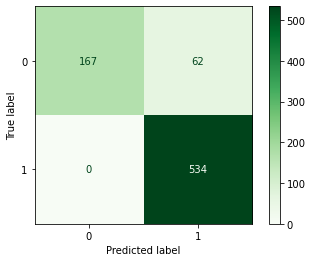

MODEL - SVM
Dokładność SVM: 0.9646133682830931
Raport klasyfikacji SVM:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       229
           1       0.95      1.00      0.98       534

    accuracy                           0.96       763
   macro avg       0.98      0.94      0.96       763
weighted avg       0.97      0.96      0.96       763


--------------------------------------------------------



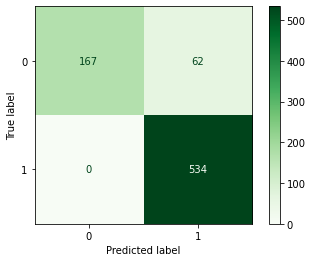

MODEL - NAIVE BAYES
Dokładność Naive Bayes: 0.9108781127129751
Raport klasyfikacji Naive Bayes:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83       229
           1       0.89      1.00      0.94       534

    accuracy                           0.91       763
   macro avg       0.94      0.85      0.88       763
weighted avg       0.92      0.91      0.91       763


--------------------------------------------------------



In [51]:
# Logistic Regression
print("\n--------------------------------------------------------\n")
print("MODEL - REGRESJA LOGISTYCZNA")
print("Dokładność:", accuracy_score(y_test, logReg_pred))
print("Raport klasyfikacji:\n", classification_report(y_test, logReg_pred))
cm_logReg_display.plot(cmap=plt.cm.Greens)
plt.show()
print("\n--------------------------------------------------------\n")

# SVM
print("MODEL - SVM")
print("Dokładność SVM:", accuracy_score(y_test, svm_pred))
print("Raport klasyfikacji SVM:\n", classification_report(y_test, svm_pred))
print("\n--------------------------------------------------------\n")

# Naive Bayes
print("MODEL - NAIVE BAYES")
print("Dokładność Naive Bayes:", accuracy_score(y_test, nb_pred))
print("Raport klasyfikacji Naive Bayes:\n", classification_report(y_test, nb_pred))
print("\n--------------------------------------------------------\n")

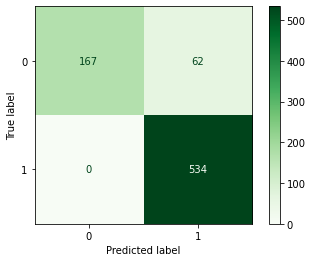

In [50]:
cm = confusion_matrix(y_test, logReg_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(cmap=plt.cm.Greens)
plt.show()